In [1]:
import sys
import os
# Manually specify the absolute path to the 'aryanml' directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Assuming you run from tests folder
aryanml_path = os.path.join(project_root, 'aryanml')

# Add the path to aryanml to sys.path|
sys.path.append(aryanml_path)

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from logistic_regression import LogisticRegression

In [3]:
breast_cancer=datasets.load_breast_cancer()
df_data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_target = pd.DataFrame(breast_cancer.target, columns=['target'])
df=pd.concat([df_data,df_target],axis=1)
df.columns


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [4]:
X_train,X_test,y_train,y_test=train_test_split(df_data,df_target,test_size=0.2,random_state=1234,shuffle=True)

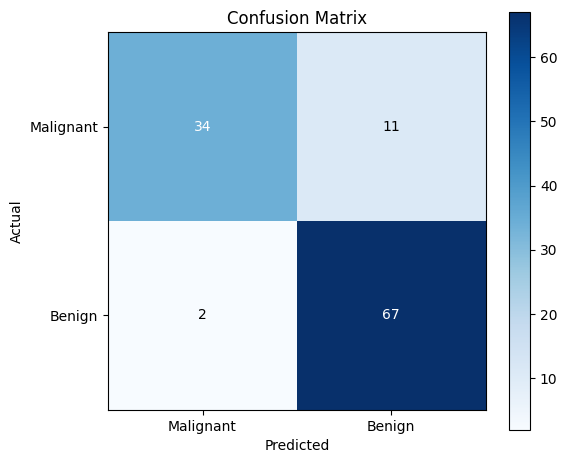

In [6]:
reg=LogisticRegression()
reg.fit(X_train.values,y_train.values)
prediction=reg.predict(X_test.values)


# Generate confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot confusion matrix using pyplot
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
classes = ['Malignant', 'Benign']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add text annotations inside the matrix
thresh = cm.max() / 2
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [10]:
# Calculate precision and recall
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
print(f"precision:{precision}")
print(f"recall:{recall}")

precision:0.8589743589743589
recall:0.9710144927536232
